In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/Deepfold2


In [31]:
from scipy.stats import pearsonr

In [33]:
def read_icshape(filename):
    r = {}
    fin = open(filename, 'r')
    for line in fin:
        c = line.strip().split('\t')
        reactivities = np.asarray(c[3:])
        reactivities[reactivities == 'NULL'] = 'nan'
        reactivities = reactivities.astype(np.float32)
        r[c[0].split('.')[0]] = reactivities
    return r

In [34]:
reactivities_longest = read_icshape('output/icSHAPE/reactivities/Lu_2016_invitro.hg19_gencode_v19_longest/icshape.out')
coverage_longest = np.asarray([float(np.sum(~np.isnan(a)))/a.shape[0] for a in reactivities_longest.values()],
                              dtype=np.float32)

In [35]:
#reactivities = read_icshape('output/icSHAPE_preprocess/Lu_2016_invitro_hg19/icshape.out')
reactivities = read_icshape('output/icSHAPE/reactivities/Lu_2016_invitro.hg38_gencode_v26/icshape.out')
coverage = np.asarray([float(np.sum(~np.isnan(a)))/a.shape[0] for a in reactivities.values()],
                              dtype=np.float32)

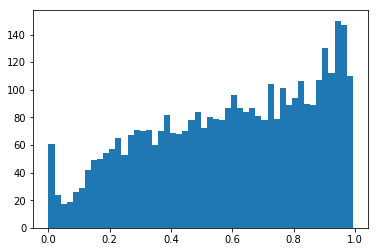

In [36]:
h = hist(coverage_longest, bins=50)

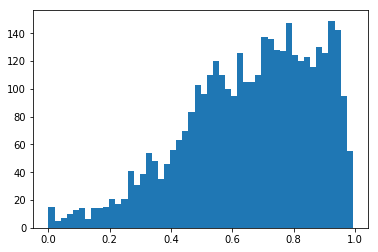

In [37]:
h = hist(coverage, bins=50)

In [38]:
common_ids = set(reactivities.keys()) & set(reactivities_longest.keys())
r_common_longest = {key:reactivities_longest[key] for key in common_ids}
r_common = {key:reactivities[key] for key in common_ids}
r_common_longest_concat = np.concatenate([r_common_longest[key] for key in common_ids])
r_common_concat = np.concatenate([r_common[key] for key in common_ids])
nan_mask = (np.isnan(r_common_longest_concat) | np.isnan(r_common_concat))
r_common_longest_concat = r_common_longest_concat[~nan_mask]
r_common_concat = r_common_concat[~nan_mask]

ValueError: operands could not be broadcast together with shapes (1994870,) (2025267,) 

In [43]:
for key in common_ids:
    l = (len(reactivities_longest[key]), len(reactivities[key]))
    if l[0] != l[1]:
        print(key, l)

ENST00000377191 (3435, 3437)
ENST00000488398 (294, 297)
ENST00000261396 (4169, 5207)
ENST00000331569 (3347, 3349)
ENST00000316939 (743, 1782)
ENST00000475761 (296, 295)
ENST00000320270 (1704, 1706)
ENST00000367569 (737, 693)
ENST00000496309 (275, 250)
ENST00000557016 (1116, 1124)
ENST00000394886 (3153, 3155)
ENST00000540040 (1555, 1553)
ENST00000520547 (3832, 3840)
ENST00000331835 (1777, 1781)
ENST00000305386 (2710, 2687)
ENST00000296802 (1393, 1199)
ENST00000571735 (2143, 2155)
ENST00000537473 (2928, 2939)
ENST00000307961 (2767, 2769)
ENST00000344548 (2254, 2256)
ENST00000369144 (5472, 6646)
ENST00000591899 (1315, 1324)
ENST00000262030 (1789, 1839)
ENST00000493013 (277, 295)
ENST00000536684 (1290, 1303)
ENST00000270586 (844, 852)
ENST00000307630 (3745, 3750)
ENST00000464472 (295, 303)
ENST00000333762 (1506, 1507)
ENST00000536192 (514, 288)
ENST00000457354 (2490, 3995)
ENST00000328848 (551, 554)
ENST00000375650 (2520, 2521)
ENST00000300035 (1511, 2194)
ENST00000380527 (1648, 1589)
ENST

In [26]:
print(r_common_concat[:50])
print(r_common_longest_concat[:50])

[ 0.16500001  0.139       0.139       0.45199999  0.47999999  0.99800003
  0.917       0.72399998  0.43799999  1.          0.88200003  0.22        0.528
  0.17299999  0.          0.094       0.          0.77399999  0.248       0.213
  0.054       0.095       0.012       0.28400001  0.70099998  1.
  0.48300001  0.32600001  0.13        0.          0.26699999  0.
  0.45300001  1.          0.028       0.26300001  0.182       0.039       0.
  0.426       0.28299999  0.25299999  0.55800003  0.132       0.491
  0.43000001  1.          0.22400001  0.036       0.098     ]
[ 0.13600001  0.009       0.156       0.56800002  1.          0.88
  0.90799999  0.722       0.25299999  1.          1.          0.18099999
  0.935       0.235       0.03        0.097       0.25400001  0.565
  0.32499999  0.18000001  0.098       0.079       0.048       0.215       1.
  1.          0.81400001  0.199       0.39300001  0.15700001  0.315
  0.57700002  0.73400003  0.98199999  0.183       0.092       0.38100001
  0.

Text(0,0.5,'Reactivities of longest isoform')

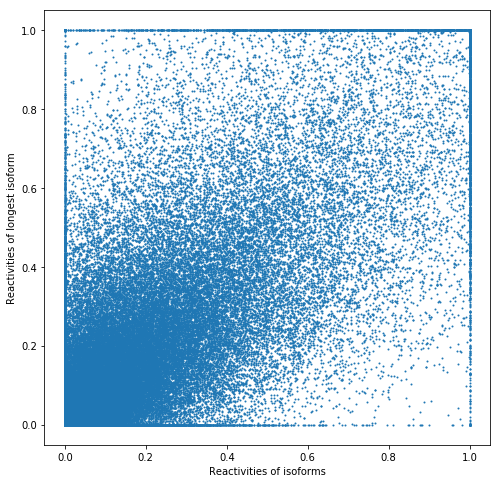

In [30]:
rand_indices = np.random.choice(r_common_concat.shape[0], size=100000, replace=True)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(r_common_concat[rand_indices], r_common_longest_concat[rand_indices], s=1)
ax.set_xlabel('Reactivities of isoforms')
ax.set_ylabel('Reactivities of longest isoform')

In [32]:
pearsonr(r_common_concat, r_common_longest_concat)

(0.78352666, 0.0)